In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC 


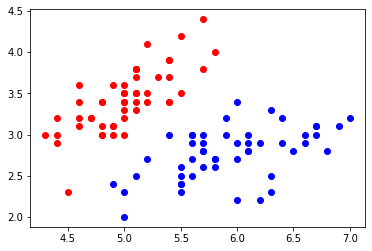

In [7]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X [y<2,:2] #只取y<2的类别，也就是0 1 并且只取前两个特征
y = y[y<2] # 只取y<2的类别

# 分别画出类别0和1的点
plt.scatter(X[y==0,0],X[y==0,1],color='red') 
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()


In [4]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)



In [8]:
# 标准化
standardScaler = StandardScaler()
standardScaler.fit(X) #计算训练数据的均值和方差
X_standard = standardScaler.transform(X) #再用scaler中的均值和方差来转换X，使X标准化
svc = LinearSVC(C=1e9) #线性SVM分类器
svc.fit(X_standard,y) # 训练svm


LinearSVC(C=1000000000.0)

<ipython-input-4-096a8349d1a9>:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


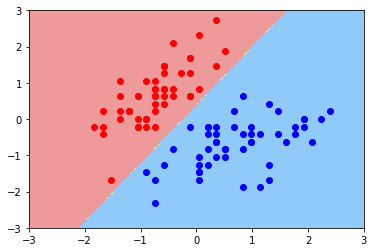

In [9]:
# 绘制决策边界
plot_decision_boundary(svc,axis=[-3,3,-3,3]) # x,y轴都在-3到3之间
# 绘制原始数据
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red') 
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='blue')
plt.show()


In [10]:
svc2 = LinearSVC(C=0.05)
svc2.fit(X_standard,y)

LinearSVC(C=0.05)

In [16]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler 
from sklearn.svm import LinearSVC 
from sklearn.pipeline import Pipeline 
def PolynomialSVC(degree,C=1.0): 
    return Pipeline([ ("poly",PolynomialFeatures(degree=degree)),#生成多项式 
                     ("std_scaler",StandardScaler()),#标准化 
                     ("linearSVC",LinearSVC(C=C))#最后生成svm 
                    ])


<ipython-input-4-096a8349d1a9>:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


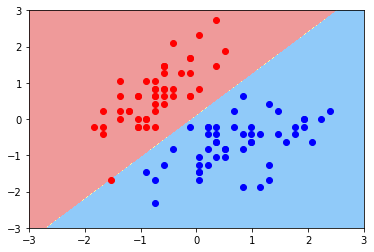

In [11]:
plot_decision_boundary(svc2,axis=[-3,3,-3,3]) # x,y轴都在-3到3之间
# 绘制原始数据
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red') 
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='blue')
plt.show()


<ipython-input-4-096a8349d1a9>:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


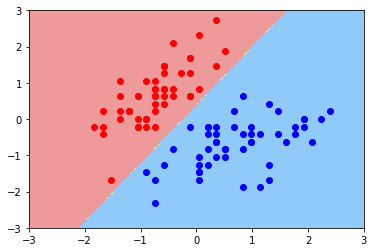

In [12]:
svc2 = LinearSVC(C=100000)
svc2.fit(X_standard,y)
plot_decision_boundary(svc2,axis=[-3,3,-3,3]) # x,y轴都在-3到3之间
# 绘制原始数据
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red') 
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='blue')
plt.show()


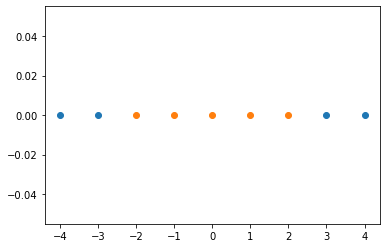

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4,5,1)#生成测试数据
y = np.array((x >= -2 ) & (x <= 2),dtype='int')

plt.scatter(x[y==0],[0]*len(x[y==0]))# x取y=0的点, y取0，有多少个x，就有多少个y
plt.scatter(x[y==1],[0]*len(x[y==1]))
plt.show()

In [14]:
def gaussian(x,l):
    gamma = 1.0
    return np.exp(-gamma * (x -l)**2)

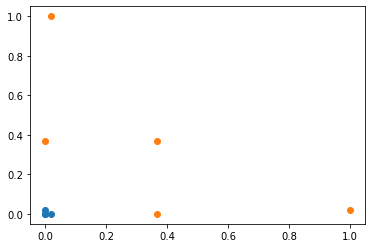

In [15]:
l1,l2 = -1,1
X_new = np.empty((len(x),2)) #len(x) ,2
for i,data in enumerate(x):
    X_new[i,0] = gaussian(data,l1)
    X_new[i,1] = gaussian(data,l2)
plt.scatter(X_new[y==0,0],X_new[y==0,1])
plt.scatter(X_new[y==1,0],X_new[y==1,1])
plt.show()

In [17]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(model, axis): 
    x0, x1 = np.meshgrid( np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1), np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1) ) 
    X_new = np.c_[x0.ravel(), x1.ravel()] 
    y_predict = model.predict(X_new) 
    zz = y_predict.reshape(x0.shape) 
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9']) 
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap) 
    # 绘制决策边界 
# plot_decision_boundary(svc,axis=[-3,3,-3,3]) 
#     # x,y轴都在-3到3之间 
#     # 绘制原始数据 
# plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red') 
# plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='blue') 
# plt.show()


In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
X, y = datasets.make_moons() 
#使用生成的数据 
print(X.shape) 
# (100,2) 
print(y.shape) 
# (100,)


(100, 2)
(100,)


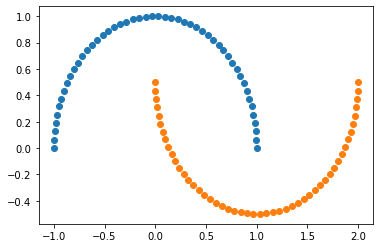

In [19]:
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) 
plt.show()


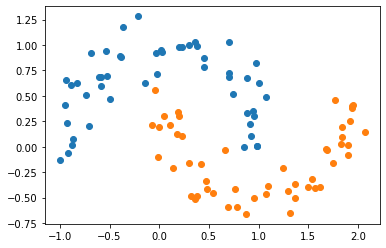

In [20]:
X, y = datasets.make_moons(noise=0.15,random_state=777) 
#随机生成噪声点，random_state是随机种子，noise是方差 
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) 
plt.show()


<ipython-input-17-094080c868ab>:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


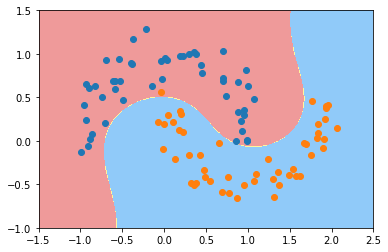

In [21]:

from sklearn.linear_model import LogisticRegressionCV
poly_svc = PolynomialSVC(degree=3) 
poly_svc.fit(X,y) 
plot_decision_boundary(poly_svc,axis=[-1.5,2.5,-1.0,1.5]) 
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) 
plt.show()


<ipython-input-17-094080c868ab>:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


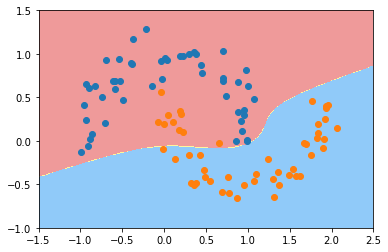

In [22]:
from sklearn.svm import SVC 
def PolynomialKernelSVC(degree,C=1.0): 
    return Pipeline([ ("std_scaler",StandardScaler()), ("kernelSVC",SVC(kernel="poly")) # poly代表多项式特征 
                    ]) 
poly_kernel_svc = PolynomialKernelSVC(degree=3) 
poly_kernel_svc.fit(X,y) 
plot_decision_boundary(poly_kernel_svc,axis=[-1.5,2.5,-1.0,1.5]) 
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) 
plt.show()


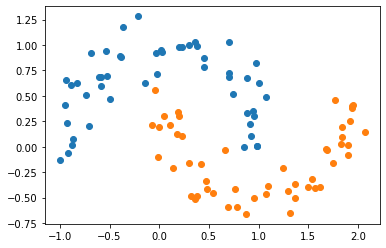

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
X,y = datasets.make_moons(noise=0.15,random_state=777) 
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) 
plt.show()


<ipython-input-17-094080c868ab>:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


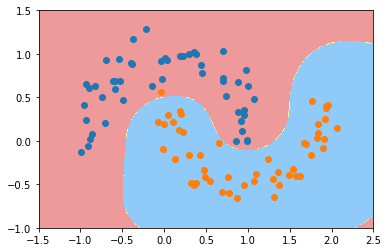

In [26]:
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline 
def RBFKernelSVC(gamma=1.0): 
    return Pipeline([ ('std_scaler',StandardScaler()), ('svc',SVC(kernel='rbf',gamma=gamma)) ]) 
svc = RBFKernelSVC() 
svc.fit(X,y) 
plot_decision_boundary(svc,axis=[-1.5,2.5,-1.0,1.5]) 
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) 
plt.show()


<ipython-input-17-094080c868ab>:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


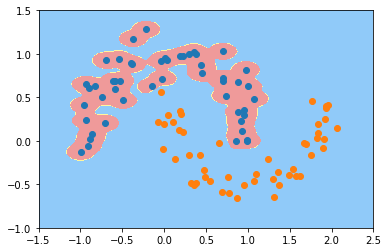

In [27]:
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline 
def RBFKernelSVC(gamma=1.0): 
    return Pipeline([ ('std_scaler',StandardScaler()), ('svc',SVC(kernel='rbf',gamma=gamma)) ]) 
svc = RBFKernelSVC(100) 
svc.fit(X,y) 
plot_decision_boundary(svc,axis=[-1.5,2.5,-1.0,1.5]) 
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) 
plt.show()


<ipython-input-17-094080c868ab>:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


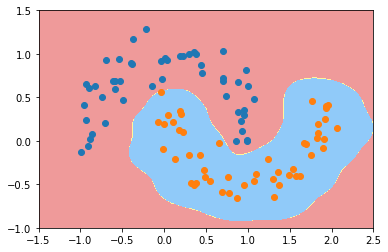

In [28]:
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline 
def RBFKernelSVC(gamma=1.0): 
    return Pipeline([ ('std_scaler',StandardScaler()), ('svc',SVC(kernel='rbf',gamma=gamma)) ]) 
svc = RBFKernelSVC(10) 
svc.fit(X,y) 
plot_decision_boundary(svc,axis=[-1.5,2.5,-1.0,1.5]) 
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) 
plt.show()


<ipython-input-17-094080c868ab>:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


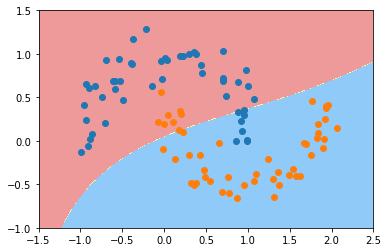

In [29]:
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline 
def RBFKernelSVC(gamma=1.0): 
    return Pipeline([ ('std_scaler',StandardScaler()), ('svc',SVC(kernel='rbf',gamma=gamma)) ]) 
svc = RBFKernelSVC(0.1) 
svc.fit(X,y) 
plot_decision_boundary(svc,axis=[-1.5,2.5,-1.0,1.5]) 
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) 
plt.show()


In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
boston = datasets.load_boston() 
X = boston.data 
y = boston.target 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=777) 
# 把数据集拆分成训练数据和测试数据 
from sklearn.svm import LinearSVR 
from sklearn.svm import SVR 
from sklearn.preprocessing import StandardScaler 
def StandardLinearSVR(epsilon=0.1): 
    return Pipeline([ ('std_scaler',StandardScaler()), ('linearSVR',LinearSVR(epsilon=epsilon)) ]) 
svr = StandardLinearSVR() 
svr.fit(X_train,y_train) 
svr.score(X_test,y_test) 


0.699275001426473

In [17]:
import numpy as np
from sklearn import datasets   #导入数据集
import matplotlib.pyplot as plt  
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [18]:
# 边界绘制函数
def plot_decision_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1))
    # meshgrid函数是从坐标向量中返回坐标矩阵
    x_new=np.c_[x0.ravel(),x1.ravel()]
    y_predict=model.predict(x_new)#获取预测值
    zz=y_predict.reshape(x0.shape)
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)

In [20]:
iris = datasets.load_iris()
data_x = iris.data[:, :2] 
data_y = iris.target

In [21]:
scaler=StandardScaler()# 标准化
data_x = scaler.fit_transform(data_x)#计算训练数据的均值和方差


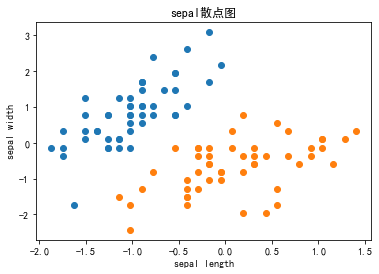

In [23]:
plt.rcParams["font.sans-serif"] = ['SimHei']    # 用来正常显示中文标签，SimHei是字体名称，字体必须在系统中存在，字体的查看方式和安装第三部分
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号
plt.scatter(data_x[data_y==0, 0],data_x[data_y==0, 1])    # 选取y所有为0的+X的第一列
plt.scatter(data_x[data_y==1, 0],data_x[data_y==1, 1])    # 选取y所有为1的+X的第一列

plt.xlabel('sepal length')    # 设置横坐标标注xlabel为sepal width
plt.ylabel('sepal width')    # 设置纵坐标标注ylabel为sepal length
plt.title('sepal散点图')    # 设置散点图的标题为sepal散点图
plt.show()


D:\Anaconda\A\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


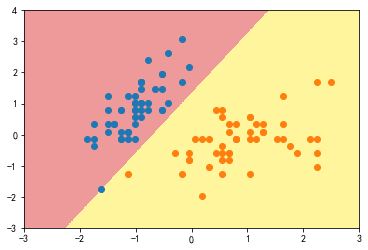

In [25]:
from sklearn.svm import LinearSVC
svc_line = LinearSVC(C =1e9,max_iter=1000000) #线性SVM分类器
svc_line.fit(data_x,data_y)#训练svm
plot_decision_boundary(svc_line,axis=[-3,3,-3,4])
plt.scatter(data_x[data_y==0,0],data_x[data_y==0,1])

plt.scatter(data_x[data_y==2,0],data_x[data_y==2,1])
plt.show()


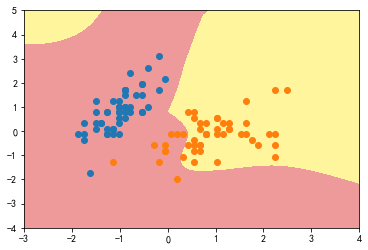

In [95]:
from sklearn.preprocessing import PolynomialFeatures #导入多项式回归
from sklearn.pipeline import Pipeline #导入python里的管道
def PolynomialSVC(degree,c=5):#多项式svm
    """
    :param d:阶数
    :param C:正则化常数
    :return:一个Pipeline实例
    """
    return Pipeline([
            # 将源数据 映射到 3阶多项式
            ("poly_features", PolynomialFeatures(degree=degree)),
            # 标准化
            ("scaler", StandardScaler()),
            # SVC线性分类器
            ("svm_clf", LinearSVC(C=c, loss="hinge", random_state=10,max_iter=100000))
        ])

poly_svc=PolynomialSVC(degree=5)
poly_svc.fit(data_x,data_y)
plot_decision_boundary(poly_svc,axis=[-3,4,-4,5])
plt.scatter(data_x[data_y==0,0],data_x[data_y==0,1])
plt.scatter(data_x[data_y==2,0],data_x[data_y==2,1])
plt.show()


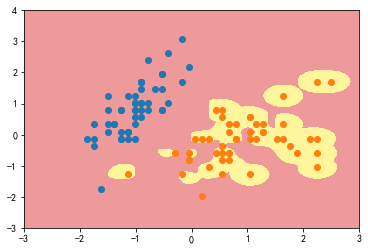

In [40]:
from sklearn.svm import SVC #导入svm
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('svc',SVC(kernel='rbf',gamma=gamma))
    ])
svc=RBFKernelSVC(gamma=42)#gamma参数很重要，gamma参数越大，支持向量越小
svc.fit(data_x,data_y)
plot_decision_boundary(svc,axis=[-3,3,-3,4])
plt.scatter(data_x[data_y==0,0],data_x[data_y==0,1])
plt.scatter(data_x[data_y==2,0],data_x[data_y==2,1])
plt.show()


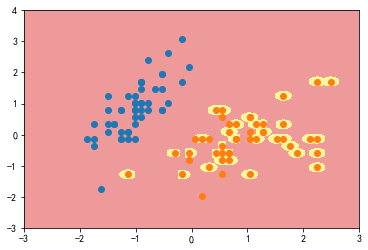

In [44]:
from sklearn.svm import SVC #导入svm
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('svc',SVC(kernel='rbf',gamma=gamma))
    ])
svc=RBFKernelSVC(gamma=500)#gamma参数很重要，gamma参数越大，支持向量越小
svc.fit(data_x,data_y)
plot_decision_boundary(svc,axis=[-3,3,-3,4])
plt.scatter(data_x[data_y==0,0],data_x[data_y==0,1])
plt.scatter(data_x[data_y==2,0],data_x[data_y==2,1])
plt.show()
